In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [2]:
from sklearn.datasets import load_iris

# Load Iris dataset (multiclass classification)
data = load_iris()
X = data.data
y = data.target

In [3]:
from sklearn.datasets import load_breast_cancer

# Load Breast Cancer dataset (binary classification)
bc_data = load_breast_cancer()
X_bc = bc_data.data
y_bc = bc_data.target

In [4]:
# Normalize the data for better performance
scaler = StandardScaler()

# For multiclass
X = scaler.fit_transform(X)

# For binary classification
X_bc = scaler.fit_transform(X_bc)

In [5]:
# For multiclass classification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# For binary classification
X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(X_bc, y_bc, test_size=0.2, random_state=42)

In [6]:
# Define model for multiclass classification
model_multiclass = Sequential()

model_multiclass.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model_multiclass.add(Dense(32, activation='relu'))
model_multiclass.add(Dense(3, activation='softmax'))  # 3 output classes

# Compile the model
model_multiclass.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Define model for binary classification
model_binary = Sequential()

model_binary.add(Dense(64, input_dim=X_train_bc.shape[1], activation='relu'))
model_binary.add(Dense(32, activation='relu'))
model_binary.add(Dense(1, activation='sigmoid'))  # Binary output class

# Compile the model
model_binary.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
history_multiclass = model_multiclass.fit(X_train, y_train, epochs=100, batch_size=10, validation_split=0.2, verbose=1)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.2677 - loss: 1.2087 - val_accuracy: 0.2917 - val_loss: 1.0513
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5151 - loss: 1.0422 - val_accuracy: 0.8333 - val_loss: 0.9348
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7929 - loss: 0.9103 - val_accuracy: 0.8750 - val_loss: 0.8167
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7548 - loss: 0.8144 - val_accuracy: 0.8750 - val_loss: 0.7127
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8555 - loss: 0.6988 - val_accuracy: 0.8333 - val_loss: 0.6232
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7763 - loss: 0.6140 - val_accuracy: 0.8750 - val_loss: 0.5607
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8465 - loss: 0.4963 - val_accuracy: 0.8750 - val_loss: 0.5038
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8290 - loss: 0.4679 - val_accuracy: 0.8750 - 

In [9]:
history_binary = model_binary.fit(X_train_bc, y_train_bc, epochs=100, batch_size=10, validation_split=0.2, verbose=1)

Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8107 - loss: 0.4815 - val_accuracy: 0.9451 - val_loss: 0.2003
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9671 - loss: 0.1475 - val_accuracy: 0.9560 - val_loss: 0.1354
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9856 - loss: 0.0763 - val_accuracy: 0.9560 - val_loss: 0.1163
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9886 - loss: 0.0773 - val_accuracy: 0.9670 - val_loss: 0.1092
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9872 - loss: 0.0577 - val_accuracy: 0.9670 - val_loss: 0.1022
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9894 - loss: 0.0393 - val_accuracy: 0.9670 - val_loss: 0.0963
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9840 - loss: 0.0424 - val_accuracy: 0.9670 - val_loss: 0.0961
Epoch 8/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9898 - loss: 0.0305 - val_accuracy: 0.9670 - v

In [10]:
test_loss_multiclass, test_acc_multiclass = model_multiclass.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy (Multiclass): {test_acc_multiclass}")

Test Accuracy (Multiclass): 1.0


In [11]:
test_loss_binary, test_acc_binary = model_binary.evaluate(X_test_bc, y_test_bc, verbose=0)
print(f"Test Accuracy (Binary): {test_acc_binary}")

Test Accuracy (Binary): 0.9824561476707458


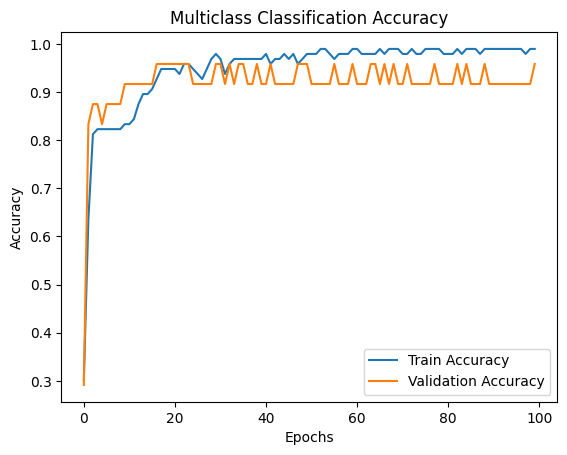

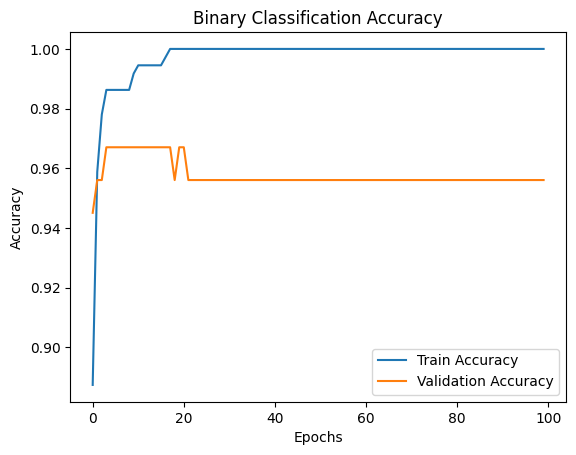

In [12]:
# For multiclass classification
plt.plot(history_multiclass.history['accuracy'], label='Train Accuracy')
plt.plot(history_multiclass.history['val_accuracy'], label='Validation Accuracy')
plt.title('Multiclass Classification Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# For binary classification
plt.plot(history_binary.history['accuracy'], label='Train Accuracy')
plt.plot(history_binary.history['val_accuracy'], label='Validation Accuracy')
plt.title('Binary Classification Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


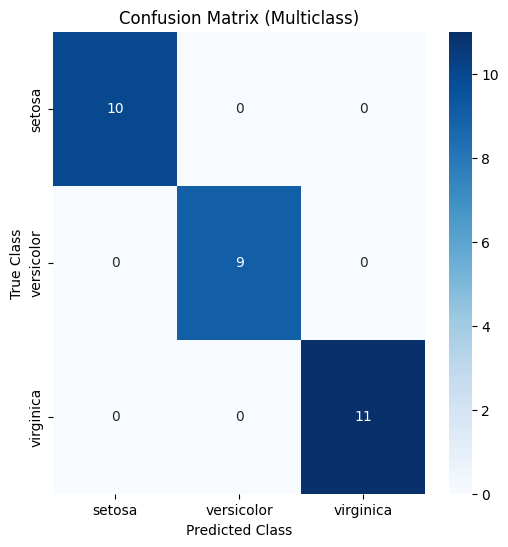

In [13]:
y_pred_multiclass = model_multiclass.predict(X_test)
y_pred_multiclass = np.argmax(y_pred_multiclass, axis=1)  # Convert probabilities to class labels

# Compute confusion matrix
cm_multiclass = confusion_matrix(y_test, y_pred_multiclass)

# Visualize confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm_multiclass, annot=True, fmt="d", cmap="Blues", xticklabels=data.target_names, yticklabels=data.target_names)
plt.title('Confusion Matrix (Multiclass)')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


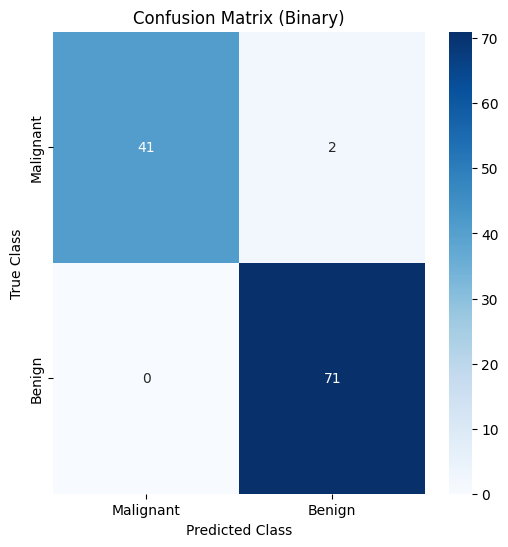

In [14]:
y_pred_binary = model_binary.predict(X_test_bc)
y_pred_binary = (y_pred_binary > 0.5).astype(int)  # Convert probabilities to class labels

# Compute confusion matrix
cm_binary = confusion_matrix(y_test_bc, y_pred_binary)

# Visualize confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm_binary, annot=True, fmt="d", cmap="Blues", xticklabels=['Malignant', 'Benign'], yticklabels=['Malignant', 'Benign'])
plt.title('Confusion Matrix (Binary)')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

In [ ]:
# Final Complete Code

#Practical 2: Classification using Deep neural network (Any One from the following) 1. Multiclass classification using Deep Neural Networks 2. Binary classification using Deep Neural Networks 

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer

# 1. Multiclass classification using Deep Neural Networks 
data = load_iris()
X = data.data
y = data.target

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_multiclass = Sequential()
model_multiclass.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model_multiclass.add(Dense(32, activation='relu'))
model_multiclass.add(Dense(3, activation='softmax'))  # 3 output classes

# Compile the model
model_multiclass.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_multiclass = model_multiclass.fit(X_train, y_train, epochs=100, batch_size=10, validation_split=0.2, verbose=1)

test_loss_multiclass, test_acc_multiclass = model_multiclass.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy (Multiclass): {test_acc_multiclass}")

plt.plot(history_multiclass.history['accuracy'], label='Train Accuracy')
plt.plot(history_multiclass.history['val_accuracy'], label='Validation Accuracy')
plt.title('Multiclass Classification Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

y_pred_multiclass = model_multiclass.predict(X_test)
y_pred_multiclass = np.argmax(y_pred_multiclass, axis=1)  # Convert probabilities to class labels
# Compute confusion matrix
cm_multiclass = confusion_matrix(y_test, y_pred_multiclass)
# Visualize confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm_multiclass, annot=True, fmt="d", cmap="Blues", xticklabels=data.target_names, yticklabels=data.target_names)
plt.title('Confusion Matrix (Multiclass)')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

############################ OR ########################

# 2. Binary classification using Deep Neural Networks 
bc_data = load_breast_cancer()
X_bc = bc_data.data
y_bc = bc_data.target

scaler = StandardScaler()
X_bc = scaler.fit_transform(X_bc)
X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(X_bc, y_bc, test_size=0.2, random_state=42)

model_binary = Sequential()
model_binary.add(Dense(64, input_dim=X_train_bc.shape[1], activation='relu'))
model_binary.add(Dense(32, activation='relu'))
model_binary.add(Dense(1, activation='sigmoid'))  # Binary output class

# Compile the model
model_binary.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history_binary = model_binary.fit(X_train_bc, y_train_bc, epochs=100, batch_size=10, validation_split=0.2, verbose=1)

test_loss_binary, test_acc_binary = model_binary.evaluate(X_test_bc, y_test_bc, verbose=0)
print(f"Test Accuracy (Binary): {test_acc_binary}")

plt.plot(history_binary.history['accuracy'], label='Train Accuracy')
plt.plot(history_binary.history['val_accuracy'], label='Validation Accuracy')
plt.title('Binary Classification Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

y_pred_binary = model_binary.predict(X_test_bc)
y_pred_binary = (y_pred_binary > 0.5).astype(int)  # Convert probabilities to class labels
# Compute confusion matrix
cm_binary = confusion_matrix(y_test_bc, y_pred_binary)
# Visualize confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm_binary, annot=True, fmt="d", cmap="Blues", xticklabels=['Malignant', 'Benign'], yticklabels=['Malignant', 'Benign'])
plt.title('Confusion Matrix (Binary)')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()